# Simple example of Markov Chain Monte Carlo 

This example is based on that given in the paper 'An Introduction to MCMC for machine learning' by Andrieu et al 2003 (Convergence seems slower though)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Number of samples drawn
sample_number=100000


In [3]:
# Functions that we are using

def poly_want_to_sample(x):
    """The polynomial we want to sample - known up to the normalising constant """
    return 0.3 * np.exp(-0.2 * x * x) + 0.7 * np.exp(-0.2 * (x - 10) * (x - 10))


def mcmc_threshold(x, y):
    """Function that generates the mcmc probaility threshold for accepting the proposed state
         x is the current state
         y is the proposed new state
         norm.pdf(x,y,100) is the function x of a normal distribution with mean y and variance 100
         """
    ratio = (poly_want_to_sample(y) * norm.pdf(x, y, 100)) / (
        poly_want_to_sample(x) * norm.pdf(y, x, 100)
    )
    # If the ratio is > 1 then the new state will always be accepted as the probability generated will be les than 1
    return min(ratio, 1)

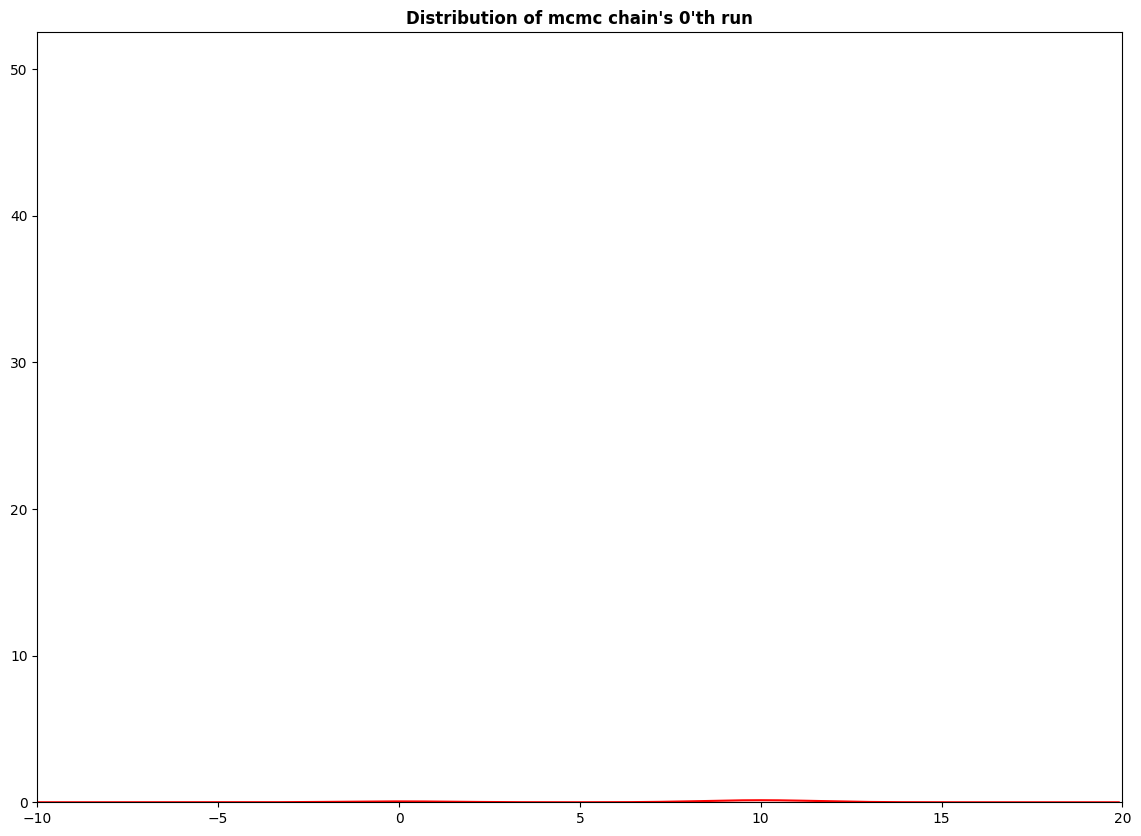

None


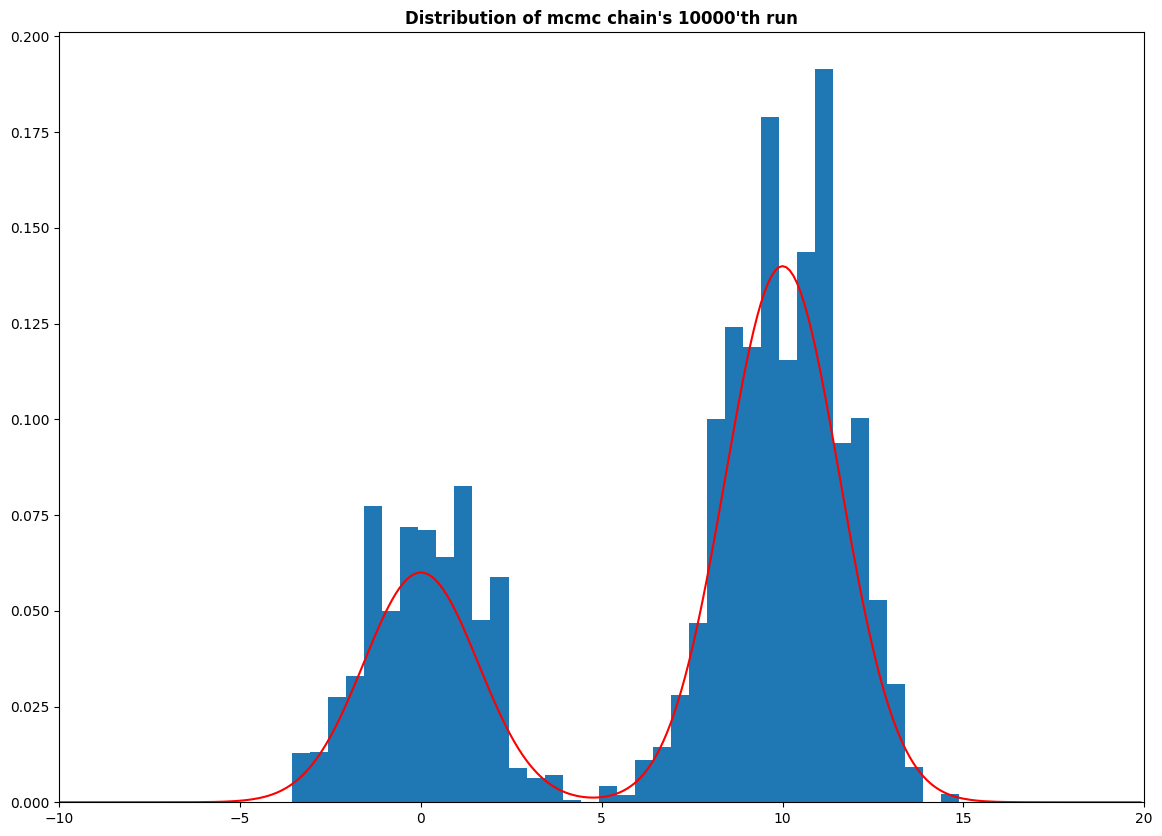

None


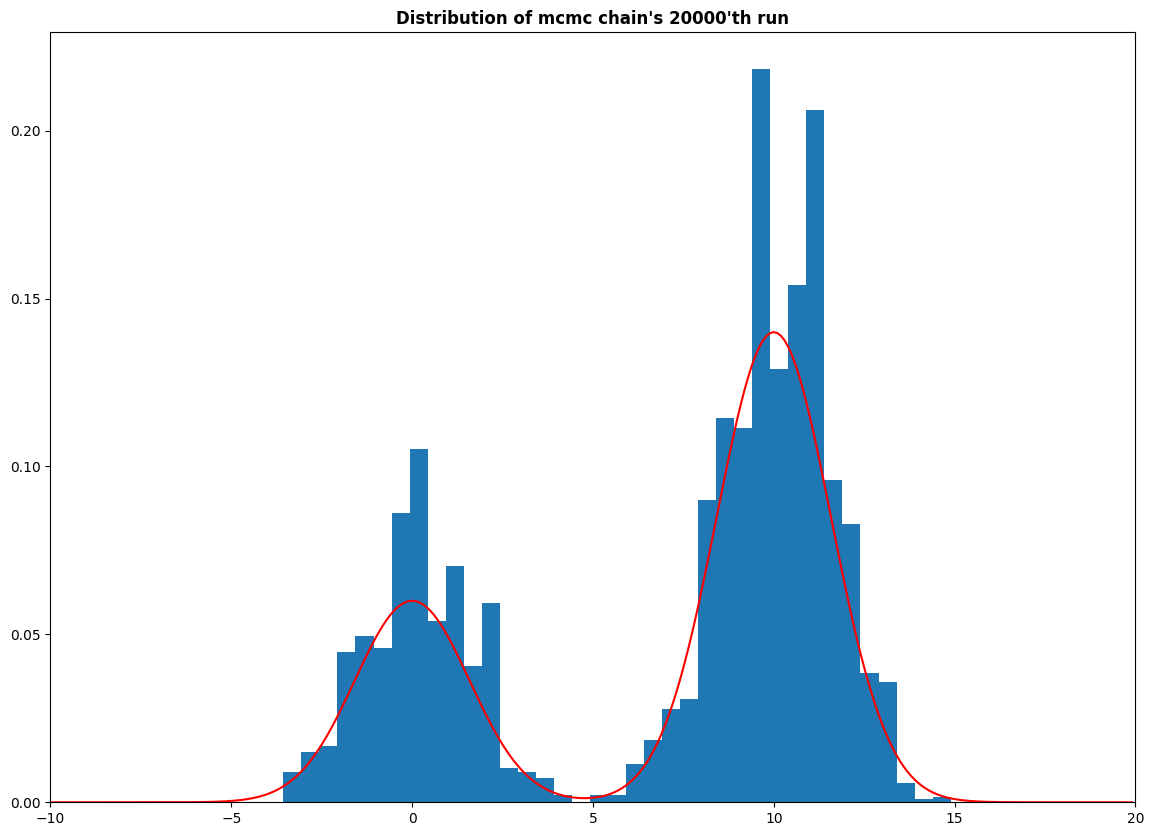

None


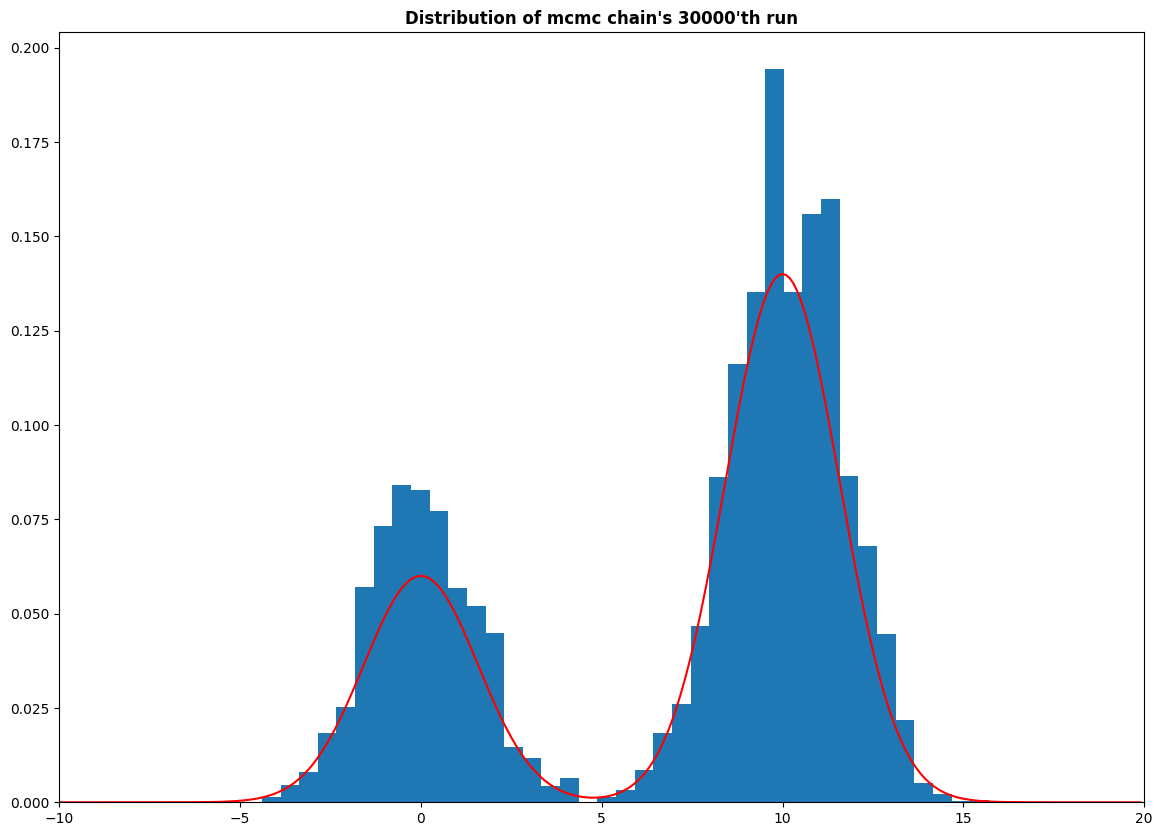

None


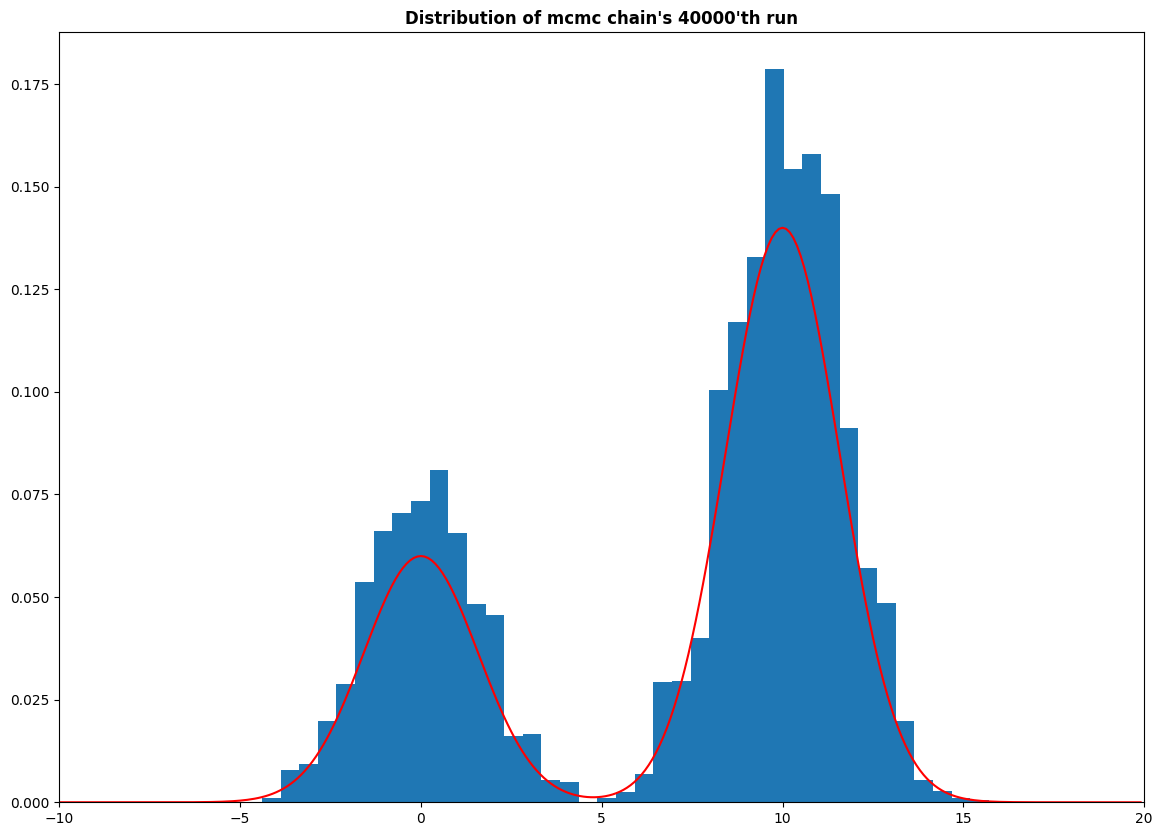

None


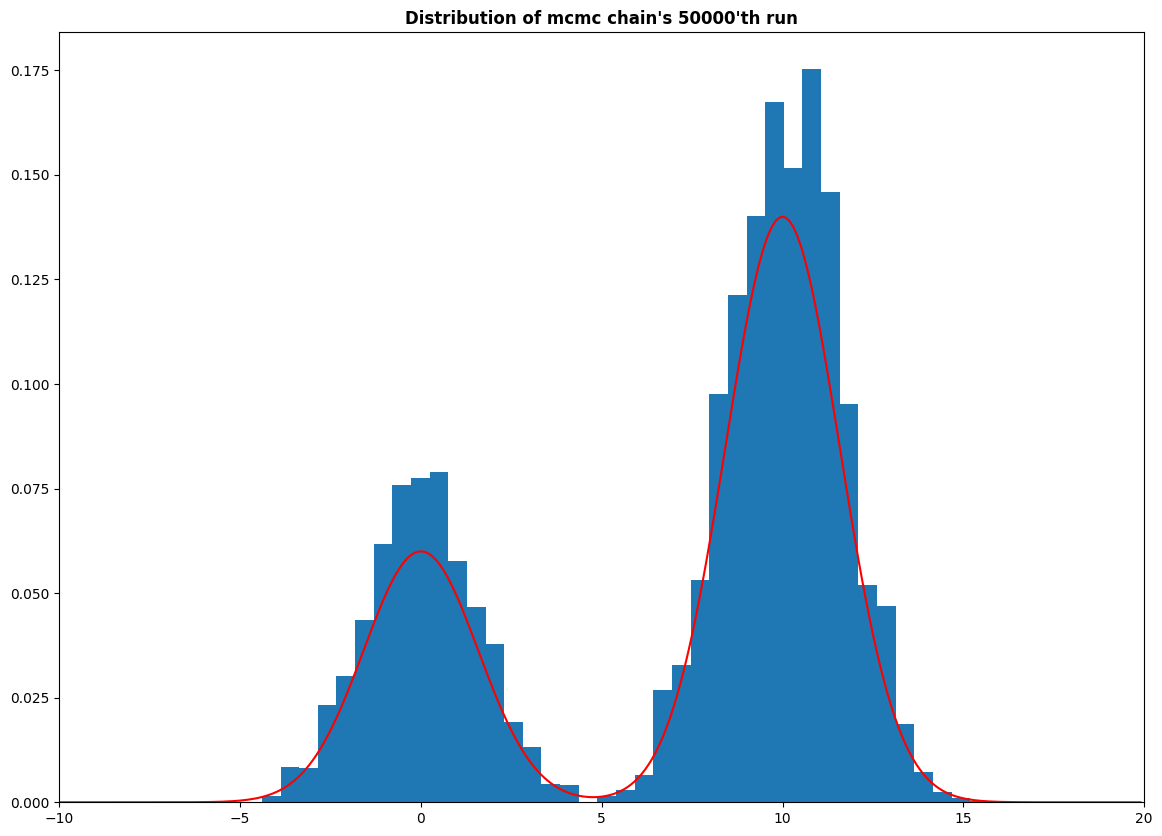

None


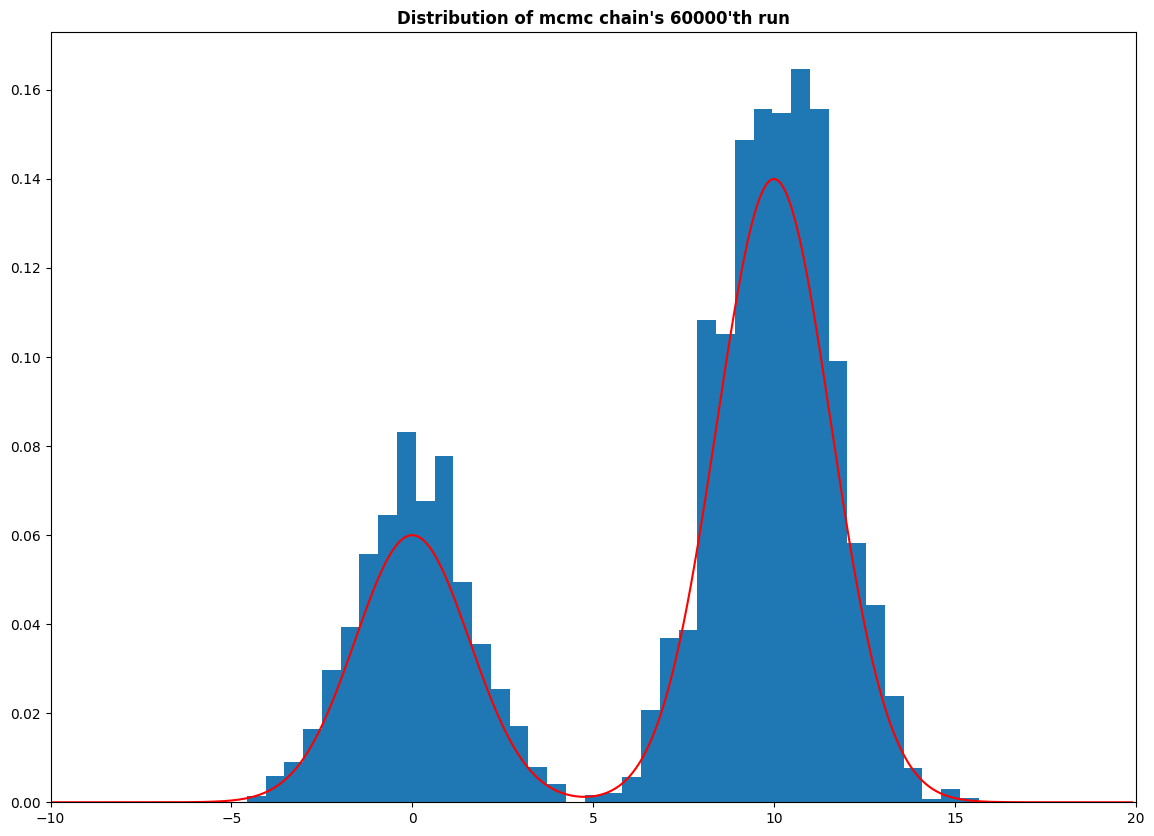

None


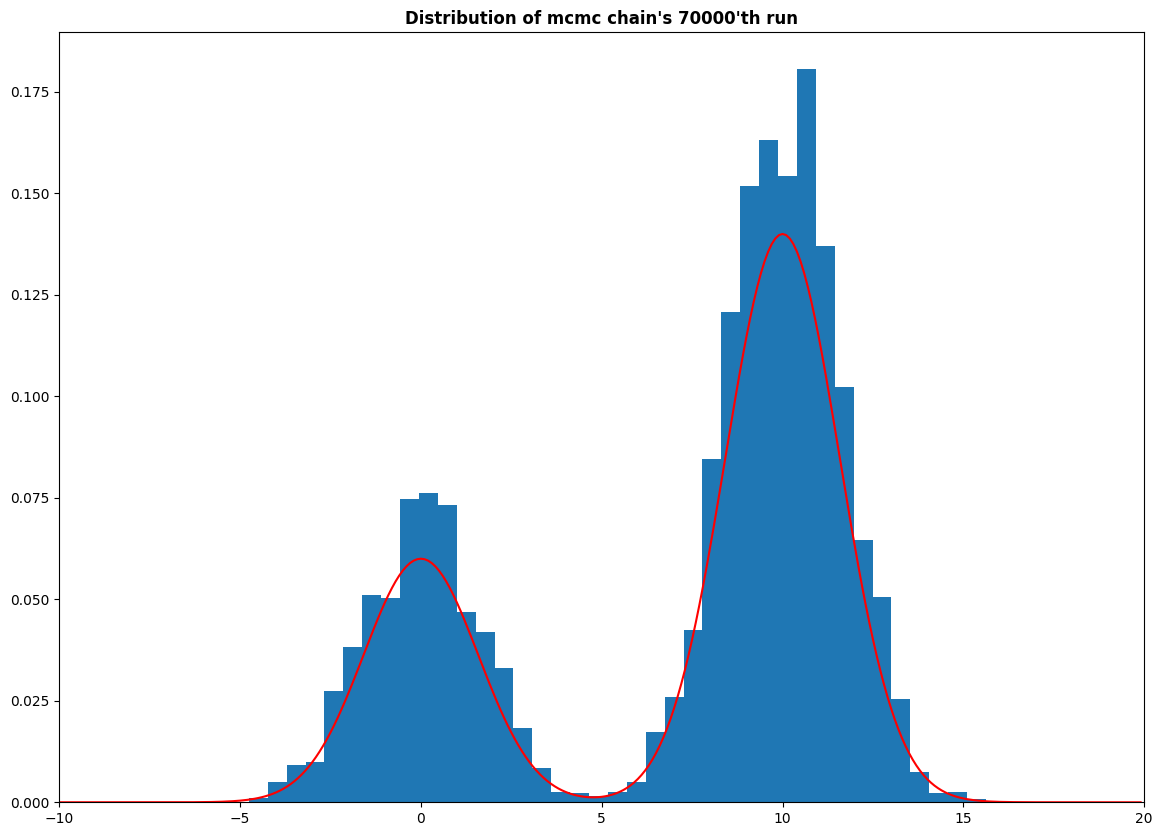

None


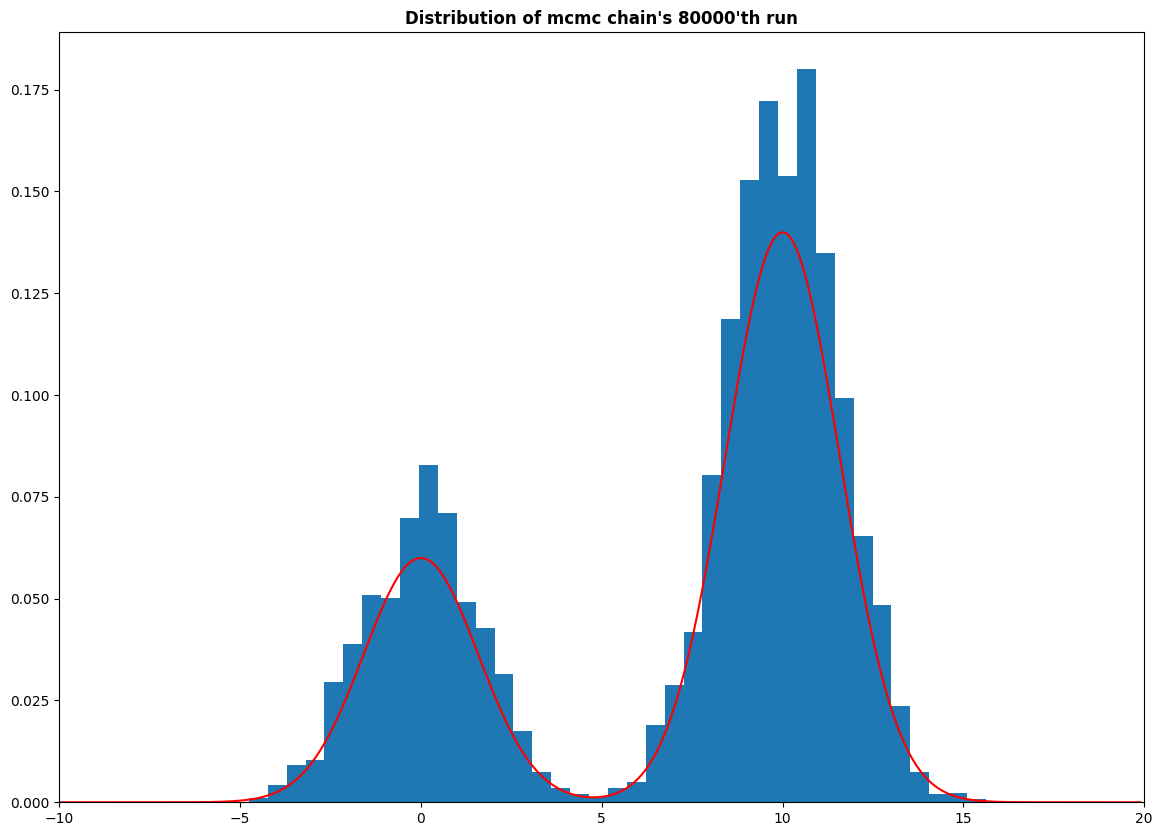

None


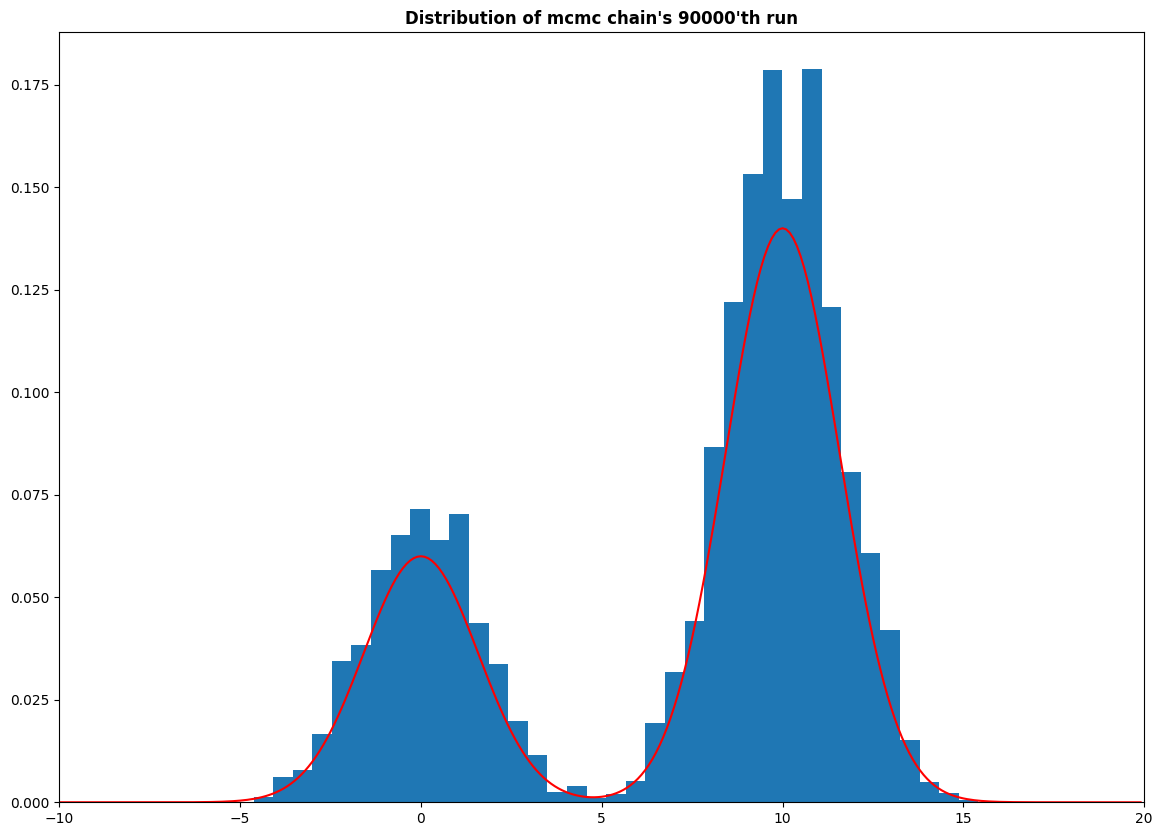

None


In [4]:
# Create a data frame to hold the results
data_store = pd.DataFrame(index=range(sample_number), columns=["state_of_chain"])


# Create an initial value to start the chain
initial_value=np.random.normal(10,10)

state = initial_value

# Run the samples
for i in range(0, sample_number):
    # Generate the proposed state
    prop_value = np.random.normal(state, 100)

    # Generate a number between 1 and 0 to simulate probability of acceptance
    prob_sample = np.random.uniform(0, 1)

    # Condition for accepting the proposed state 
    # the probability of the state being accepted is prob_sample
    if prob_sample < mcmc_threshold(state, prop_value):
        state = prop_value
    else:
        state = state
    # Storing the value in the dataframe
    data_store["state_of_chain"].loc[i] = state
    # Prints charts at regular intervals
    if i % 10000 == 0:
        plt.figure(figsize=(14, 10))
        plt.xlim(-10, 20)
        plt.hist(data_store["state_of_chain"], density=True, bins=50)
        plt.title("Distribution of mcmc chain's " + str(i) + "'th run", weight="bold")
        x = np.arange(-10, 20, 0.1)
        # Plots the probability distribution we want to sample scaled to chart
        plt.plot(x, poly_want_to_sample(x)*0.2, color="red")
        print(plt.show())